In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
mat = loadmat('/Users/daniel/Documents/A4/PYTHON/PROJET/Datasets/dataset1/data_te.mat')
test1 = mat['data_te']
mat = loadmat('/Users/daniel/Documents/A4/PYTHON/PROJET/Datasets/dataset1/data_tr.mat')
train1 = mat['data_tr']
data_tr=pd.DataFrame(train1)
data_te=pd.DataFrame(test1)
data_te.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.011144,0.010568,0.005403,0.005441,0.595357,-1.414428,0.027908,0.000473,0.015294,123.280702,...,193.21,280.154910,138.0,16.3086,2.973865,7.098149,1145.0,70.0,339.163692,1.0
1,0.009074,0.009746,0.004770,0.005561,0.817434,-0.945456,0.027311,0.000031,0.013160,102.565217,...,743.85,499.331682,1130.0,0.0000,-0.517908,-1.728870,1130.0,70.0,894.511951,1.0
2,0.010618,0.009797,0.007069,0.009864,0.458063,-1.428265,0.027570,0.000007,0.014343,99.937500,...,567.72,514.805486,151.0,120.0906,0.168299,-1.971775,1130.0,70.0,764.643996,1.0
3,0.006668,0.008201,0.002745,0.003318,1.171704,-0.173755,0.026633,0.000009,0.010460,92.206897,...,649.11,517.013801,1130.0,0.0000,-0.145954,-1.981538,1145.0,70.0,828.235492,1.0
4,0.009447,0.011816,0.005154,0.005924,2.325694,5.693968,0.052976,0.000005,0.014917,99.954545,...,684.36,509.183790,1130.0,0.0000,-0.268890,-1.928930,1130.0,70.0,851.483447,1.0


In [3]:
features={0:"uplink_size_mean",
1:"uplink_size_median",
2:"uplink_size_MAD",
3:"uplink_size_STD",
4:"uplink_size_Skewness",
5:"uplink_size_Kurtosis",
6:"uplink_size_MAX",
7:"uplink_size_MIN",
8:"uplink_size_MeanSquare",
9:"downlink_size_mean",
10:"downlink_size_median",
11:"downlink_size_MAD",
12:"downlink_size_STD",
13:"downlink_size_Skewness",
14:"downlink_size_Kurtosis",
15:"downlink_size_MAX",
16:"downlink_size_MIN",
17:"downlink_size_MeanSquare",
18:"both_links_size_mean",
19:"both_links_size_median",
20:"both_links_size_MAD",
21:"both_links_size_STD",
22:"both_links_size_Skewness",
23:"both_links_size_Kurtosis",
24:"both_links_size_MAX",
25:"both_links_size_MIN",
26:"both_links_size_MeanSquare",
27:"uplink_interval_mean",
28:"uplink_interval_median",
29:"uplink_interval_MAD",
30:"uplink_interval_STD",
31:"uplink_interval_Skewness",
32:"uplink_interval_Kurtosis",
33:"uplink_interval_MAX",
34:"uplink_interval_MIN",
35:"uplink_interval_MeanSquare",
36:"downlink_interval_mean",
37:"downlink_interval_median",
38:"downlink_interval_MAD",
39:"downlink_interval_STD",
40:"downlink_interval_Skewness",
41:"downlink_interval_Kurtosis",
42:"downlink_interval_MAX",
43:"downlink_interval_MIN",
44:"downlink_interval_MeanSquare",
45:"both_links_interval_mean",
46:"both_links_interval_median",
47:"both_links_interval_MAD",
48:"both_links_interval_STD",
49:"both_links_interval_Skewness",
50:"both_links_interval_Kurtosis",
51:"both_links_interval_MAX",
52:"both_links_interval_MIN",
53:"both_links_interval_MeanSquare",
54:"label"}

In [4]:
data_te= data_te.rename(columns=features)
data_tr=data_tr.rename(columns=features)
data_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17629 entries, 0 to 17628
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   uplink_size_mean                17629 non-null  float64
 1   uplink_size_median              17629 non-null  float64
 2   uplink_size_MAD                 17629 non-null  float64
 3   uplink_size_STD                 17629 non-null  float64
 4   uplink_size_Skewness            17629 non-null  float64
 5   uplink_size_Kurtosis            17629 non-null  float64
 6   uplink_size_MAX                 17629 non-null  float64
 7   uplink_size_MIN                 17629 non-null  float64
 8   uplink_size_MeanSquare          17629 non-null  float64
 9   downlink_size_mean              17629 non-null  float64
 10  downlink_size_median            17629 non-null  float64
 11  downlink_size_MAD               17629 non-null  float64
 12  downlink_size_STD               

label                             1.000000
both_links_interval_MIN           0.976437
downlink_interval_MIN             0.849652
downlink_size_MAX                 0.742546
downlink_size_MIN                 0.730564
downlink_size_MeanSquare          0.665829
downlink_size_mean                0.644901
downlink_size_median              0.598818
uplink_interval_MIN               0.566412
downlink_size_MAD                 0.503821
both_links_interval_MAX           0.439436
uplink_interval_Kurtosis          0.379975
both_links_interval_Skewness      0.344019
uplink_size_Skewness              0.343666
downlink_interval_Kurtosis        0.324745
uplink_interval_STD               0.305793
uplink_size_Kurtosis              0.304020
both_links_interval_Kurtosis      0.298865
downlink_interval_Skewness        0.294165
uplink_interval_median            0.289250
both_links_interval_mean          0.284998
both_links_size_Kurtosis          0.268508
downlink_size_Kurtosis            0.263739
downlink_si

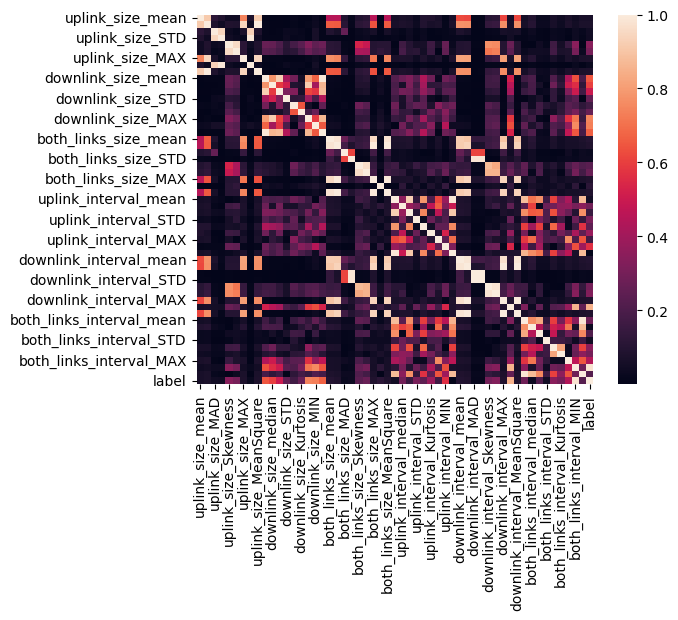

In [30]:
corrMatrix = data_te.corr()
print(corrMatrix['label'].abs().sort_values(ascending=False))
sns.heatmap(corrMatrix.abs())
plt.show()

Text(0.5, 1.0, 'Scatter plot between uplink size and interval according to the label')

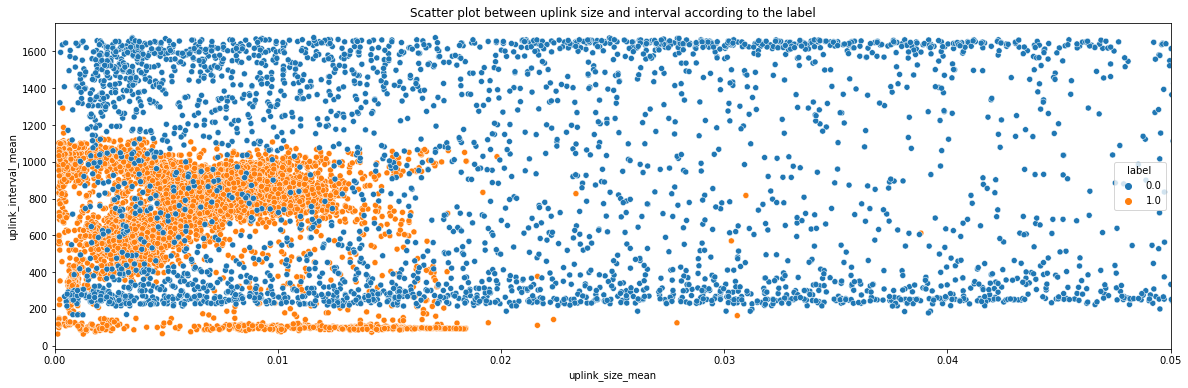

In [6]:
plt.figure(figsize = (20, 6))
sns.scatterplot(data=data_te, x="uplink_size_mean", y="uplink_interval_mean",hue="label")
plt.xlim(0,0.05)
plt.xlabel('uplink_size_mean')
plt.ylabel('uplink_interval_mean')
plt.title('Scatter plot between uplink size and interval according to the label')

Text(0.5, 1.0, 'Scatter plot between uplink size and interval according to the label (yellow=UAV)')

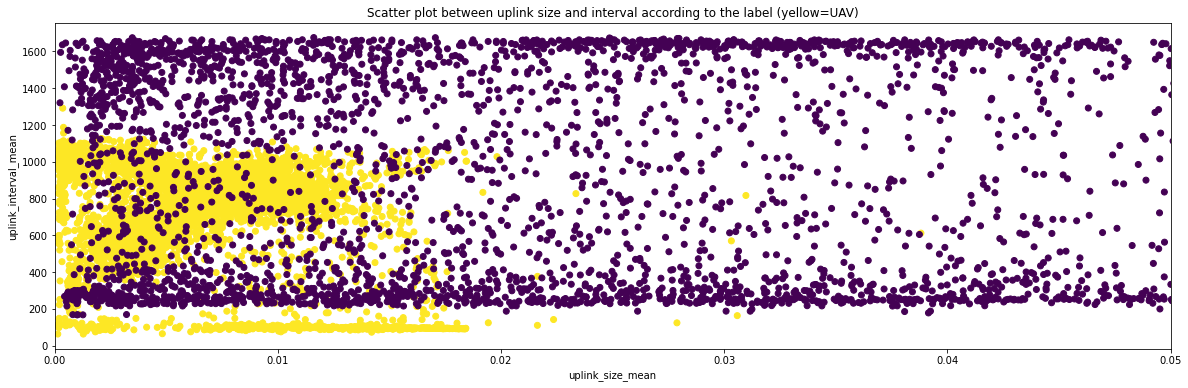

In [7]:
plt.figure(figsize = (20, 6))
plt.scatter(data_te["uplink_size_mean"],data_te['uplink_interval_mean'],c=data_te["label"])
plt.xlim(0,0.05)
plt.xlabel('uplink_size_mean')
plt.ylabel('uplink_interval_mean')
plt.title('Scatter plot between uplink size and interval according to the label (yellow=UAV)')
   

(0.0, 0.05)

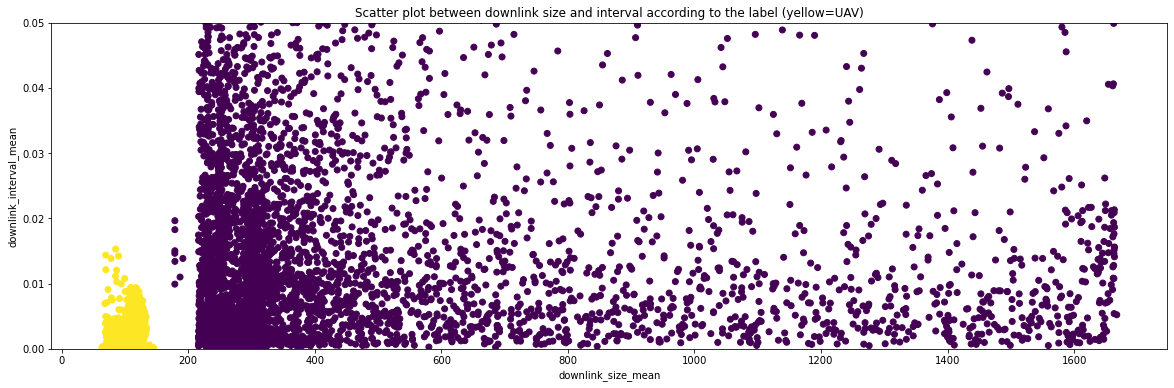

In [8]:
plt.figure(figsize = (20, 6))
plt.scatter(data_te["downlink_size_mean"],data_te['downlink_interval_mean'],c=data_te["label"])
plt.xlabel('downlink_size_mean')
plt.ylabel('downlink_interval_mean')
plt.title('Scatter plot between downlink size and interval according to the label (yellow=UAV)')
plt.ylim(0,0.05)

In [9]:
count1label=data_te['label'].sum()
pourcentage_de_UAV=count1label/data_te.shape[0]
round(pourcentage_de_UAV*100,2)

55.36

(array([1166.,   94.,   60.,   41.,   14.,   24.,   12.,   11.,   11.,
          10.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <BarContainer object of 10 artists>)

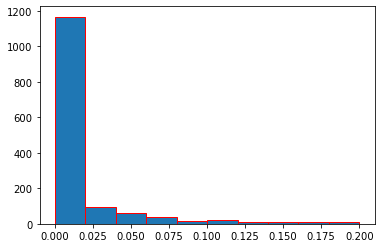

In [10]:
l = [i+1 for i in range(data_tr.shape[0]+1)]
n=data_tr.shape[0]
plt.hist(data_tr['uplink_size_mean'],range = (0, 0.2),
            edgecolor = 'red')

**CLASSIFICATION** :

SVC classifier :

In [11]:
from sklearn.svm import SVC

x_features=['both_links_interval_MIN','downlink_interval_MIN']

X_train=data_tr[x_features]
y_train=data_tr['label']
X_test=data_te[x_features]
y_test=data_te['label']

classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(X_train, y_train)

#Prediction sur le Test set
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7869
         1.0       1.00      1.00      1.00      9760

    accuracy                           1.00     17629
   macro avg       1.00      1.00      1.00     17629
weighted avg       1.00      1.00      1.00     17629



KNC:

In [12]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors=5)
KNC.fit(X_train,y_train)
predicted= KNC.predict(X_test) 
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7869
         1.0       1.00      1.00      1.00      9760

    accuracy                           1.00     17629
   macro avg       1.00      1.00      1.00     17629
weighted avg       1.00      1.00      1.00     17629



In [13]:
names=[v for v in features.values()]
X_train_all=data_tr[names[:-1]]
X_test_all=data_te[names[:-1]]

Scaling all data

In [14]:
from sklearn.preprocessing import StandardScaler
columns = X_train_all.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(X_train_all)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(X_test_all)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

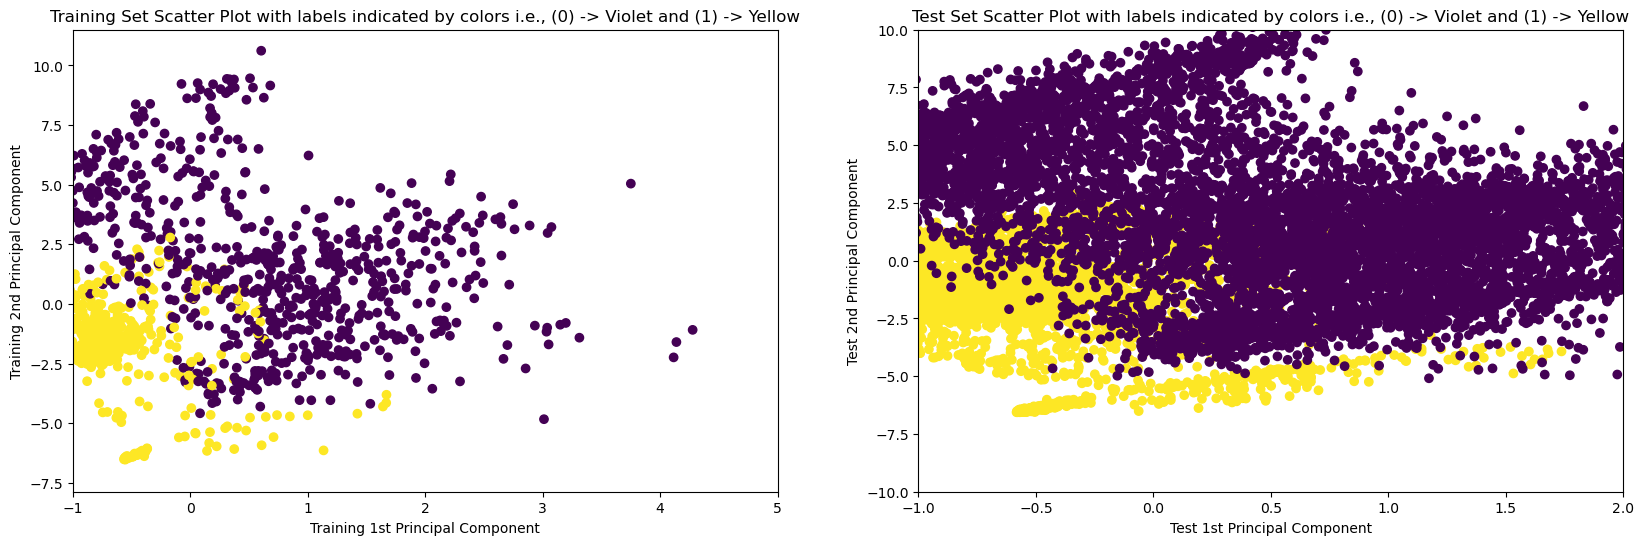

In [16]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlim(-1,5)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = y_test)
plt.ylim(-10,10)
plt.xlim(-1,2)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()

In [17]:
params = {'C':[0.01, 0.1, 1, 10, 100]}

clf = LogisticRegression()

folds = 5
model_cv = GridSearchCV(estimator = clf, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 3)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........C=0.01;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END ........C=0.01;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/5] END ........C=0.01;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END ........C=0.01;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END ........C=0.01;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END .........C=0.1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END .........C=0.1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/5] END .........C=0.1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END .........C=0.1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END .........C=0.1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END ...........C=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END ...........C=1;, score=(train=1.000,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='accuracy', verbose=3)

In [18]:
print(model_cv.best_params_)

{'C': 0.01}


Re-training the Logistic Regression Classifier with the best hyper-parameter, C = 0.01

In [19]:
model = LogisticRegression(C = 0.01).fit(X_train_pca, y_train)

In [20]:
# getting the Training Set Predictions
y_train_pred = model.predict(X_train_pca)

# getting the Test Set Predictions
y_test_pred = model.predict(X_test_pca)

In [21]:
# Getting the Training and Test Accuracy of the Logistic Regression Model
print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_test_pred))
print()

# Getting the Training and Test Precision of the Logistic Regression Model
print('Training Precision of the Model: ', metrics.precision_score(y_train, y_train_pred))
print('Test Precision of the Model: ', metrics.precision_score(y_test, y_test_pred))
print()

# Getting the Training and Test Recall of the Logistic Regression Model
print('Training Recall of the Model: ', metrics.recall_score(y_train, y_train_pred))
print('Test Recall of the Model: ', metrics.recall_score(y_test, y_test_pred))
print()

# Getting the Training and Test F1-Score of the Logistic Regression Model
print('Training F1-Score of the Model: ', metrics.f1_score(y_train, y_train_pred))
print('Test F1-Score of the Model: ', metrics.f1_score(y_test, y_test_pred))
print()

Training Accuracy of the Model:  0.923472301541976
Test Accuracy of the Model:  0.9207555732032446

Training Precision of the Model:  0.9086395233366436
Test Precision of the Model:  0.909589577823489

Training Recall of the Model:  0.9561128526645768
Test Recall of the Model:  0.9514344262295082

Training F1-Score of the Model:  0.9317718940936864
Test F1-Score of the Model:  0.9300415644248585



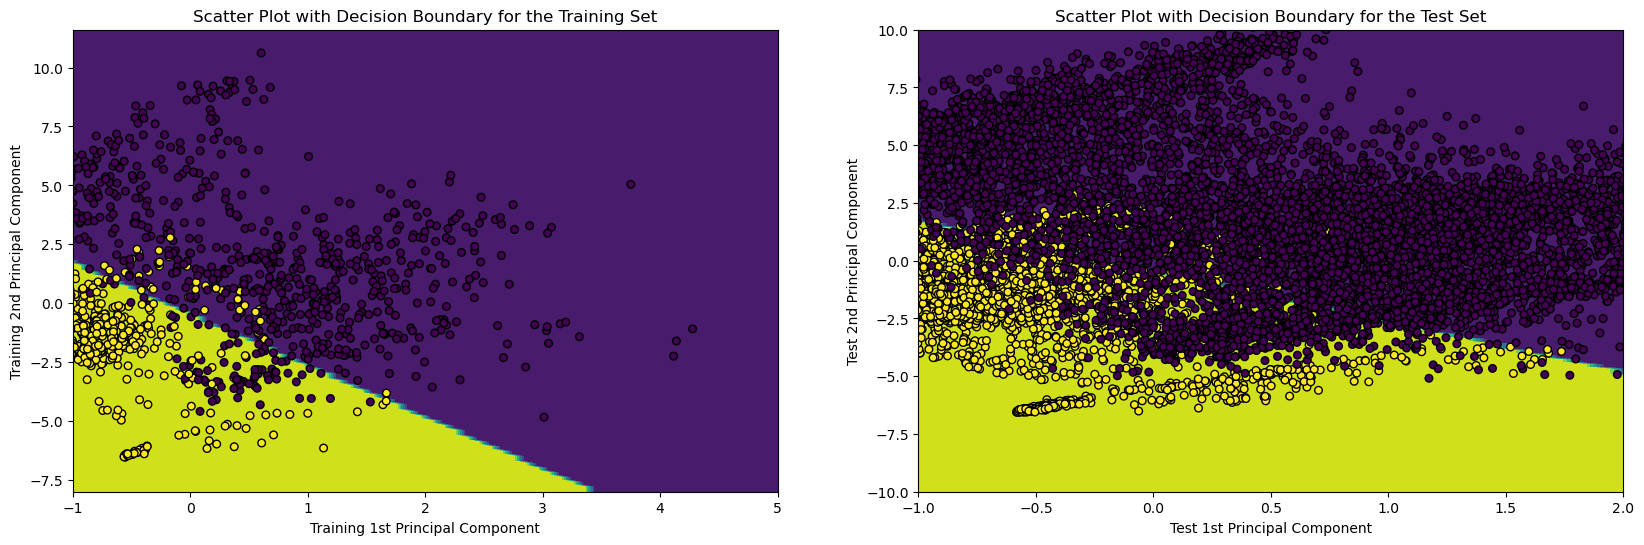

In [22]:
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)

plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, s = 30, edgecolor = 'k')
plt.xlim(-1,5)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, s = 30, edgecolor = 'k')
plt.xlim(-1,2)
plt.ylim(-10,10)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()